### **Adult Income Analysis**

---

#### **1. Project Overview**

This project performs an in-depth analysis of the Adult Income dataset, originally from the UCI Machine Learning Repository and hosted on Kaggle. The dataset includes demographic and employment information of individuals, categorizing their income levels into two classes: <=50K and >50K. Through this analysis, we aim to uncover socio-economic patterns and key factors that contribute to higher income levels, providing insights that could benefit sectors like policy-making, human resources, and socio-economic research.

---

#### **2. Problem Statement**

The main objective of this project is to identify the factors associated with higher income among adults. Specifically, we aim to answer questions such as:
- Which demographic factors, like age, gender, and work class, are linked to higher income levels?
- Does education level significantly impact income potential?
- Are certain occupations associated with higher earnings?

By answering these questions, we aim to deliver valuable insights into the socio-economic determinants of income distribution.

---

#### **3. Dataset**

- **Source**: [Adult Income Dataset on Kaggle](https://www.kaggle.com/datasets/wenruliu/adult-income-dataset)
- **Description**: The dataset includes variables such as age, work class, education level, marital status, occupation, race, and gender, along with an income label indicating whether the individual earns more or less than 50K.

---

#### **4. Libraries Used**

The following Python libraries are utilized for data manipulation, analysis, and visualization:

- **Pandas**: For data handling and cleaning.
- **NumPy**: For numerical computations and handling missing values.
- **Matplotlib** and **Seaborn**: For creating plots and visualizing data trends.
- **Scikit-learn**: For encoding categorical variables and data transformations.

---

#### **5. Data Visualization**

Various visualization techniques are applied to understand the relationships between income and demographic factors:
- **Histograms** for examining age distribution and income categories.
- **Bar charts** to analyze work class, education, and gender distributions.
- **Box plots** to observe age variation across income classes.
- **Count plots** to visualize frequency distributions in categorical data.

Visualizing these relationships enables us to easily identify patterns and trends related to income.

---

#### **6. Analysis Queries**

To align with the project objectives, the analysis addresses several queries:
1. **What are the age, education, and work class distributions among individuals with high income?**
2. **How does gender impact income levels, and is there a noticeable gender disparity?**
3. **Does higher education correlate with a higher income, and to what degree?**
4. **Are there certain work classes that are significantly linked with higher income?**

This project provides insights that can support career guidance, socio-economic policy formulation, and research on income disparities.

---

#### **Author**

This project was created by [Shaun Mia](https://www.linkedin.com/in/shaun-mia/), a data analyst and AI enthusiast with a passion for uncovering insights through data analysis and visualization.

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Setup and Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Configuring plot settings
sns.set(style='whitegrid')
plt.style.use('seaborn')


<ipython-input-3-c0d2e5020696>:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# 2. Load Dataset and Initial Exploration

In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Data Analysis/Python Project/Adult Income Analysis/adult.csv')

# Display the first 5 rows
print("Top 5 Rows of the Dataset:")
display(data.head())

# Display the last 5 rows
print("Last 5 Rows of the Dataset:")
display(data.tail())

# Check dataset shape (number of rows and columns)
print("Dataset Shape (Rows, Columns):", data.shape)

# Get dataset info
print("Dataset Information:")
data.info()


Top 5 Rows of the Dataset:


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Last 5 Rows of the Dataset:


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


Dataset Shape (Rows, Columns): (48842, 15)
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# 3. Fetch a Random Sample (50%) of the Dataset

In [ ]:
# Fetch random 50% sample
sample_data = data.sample(frac=0.5, random_state=42)
print("Random 50% Sample of the Dataset:")
display(sample_data.head())

Random 50% Sample of the Dataset:


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
7762,56,Private,33115,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
23881,25,Private,112847,HS-grad,9,Married-civ-spouse,Transport-moving,Own-child,Other,Male,0,0,40,United-States,<=50K
30507,43,Private,170525,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,14344,0,40,United-States,>50K
28911,32,Private,186788,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
19484,39,Private,277886,Bachelors,13,Married-civ-spouse,Sales,Wife,White,Female,0,0,30,United-States,<=50K


#4. Check and Handle Missing Values

In [ ]:
# Replace '?' with NaN
data.replace(' ?', np.nan, inplace=True)

# Check for missing values
print("Missing Values in Each Column:")
print(data.isnull().sum())

# Drop missing values
data.dropna(inplace=True)

Missing Values in Each Column:
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


# 5. Check for and Drop Duplicates

In [ ]:
# Check for duplicates
duplicate_rows = data.duplicated().sum()
print(f"Number of Duplicate Rows: {duplicate_rows}")

# Drop duplicates if any
data = data.drop_duplicates()

Number of Duplicate Rows: 52


#6. Statistical Summary and Drop Unnecessary Columns

In [ ]:
# Check which columns are available in the dataset
columns_to_drop = ['education-num', 'capital-gain', 'capital-loss']
existing_columns = [col for col in columns_to_drop if col in data.columns]

# Drop only the columns that exist in the dataset
data = data.drop(columns=existing_columns)

# Display the first few rows after dropping the columns
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,30,United-States,<=50K


In [ ]:
# Correct column names based on the dataset
columns_to_drop = ['educational-num', 'capital-gain', 'capital-loss']
existing_columns = [col for col in columns_to_drop if col in data.columns]

# Drop only the columns that exist in the dataset
data = data.drop(columns=existing_columns)

# Display the first few rows after dropping the columns
data.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,18,?,103497,Some-college,Never-married,?,Own-child,White,Female,30,United-States,<=50K


In [ ]:
# Get a statistical summary of the dataset
print("Overall Statistics of the Dataset:")
print(data.describe())

Overall Statistics of the Dataset:
                age        fnlwgt  hours-per-week
count  48790.000000  4.879000e+04    48790.000000
mean      38.652798  1.896690e+05       40.425886
std       13.708493  1.056172e+05       12.392729
min       17.000000  1.228500e+04        1.000000
25%       28.000000  1.175550e+05       40.000000
50%       37.000000  1.781385e+05       40.000000
75%       48.000000  2.376062e+05       45.000000
max       90.000000  1.490400e+06       99.000000


# 7. Univariate Analysis

**Income**

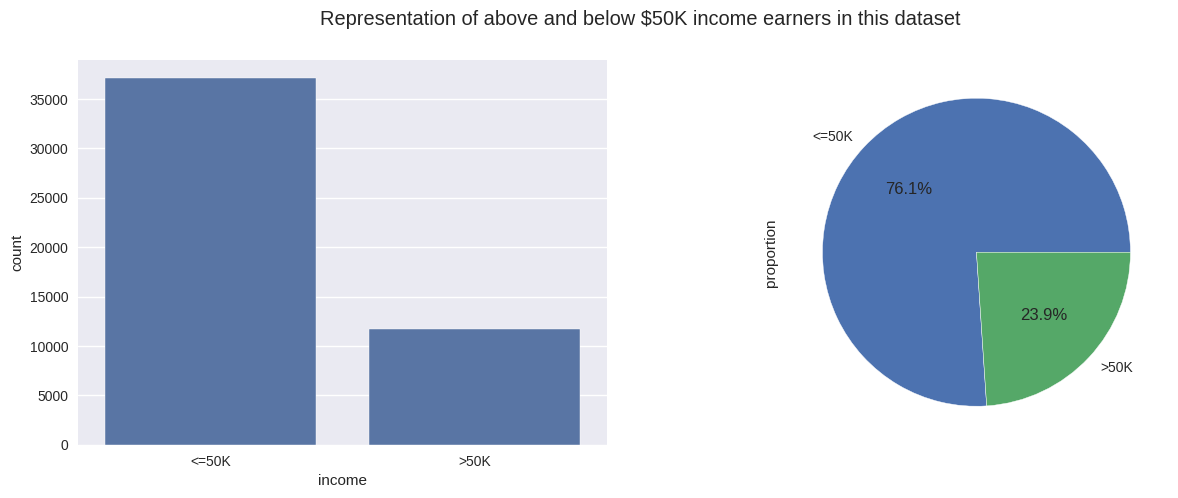

In [ ]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(x='income', data=data, ax=axes[0])
data.income.value_counts(normalize=True).plot.pie(ax=axes[1], autopct='%1.1f%%')
plt.suptitle('Representation of above and below $50K income earners in this dataset');

**Distribution of Age Column**

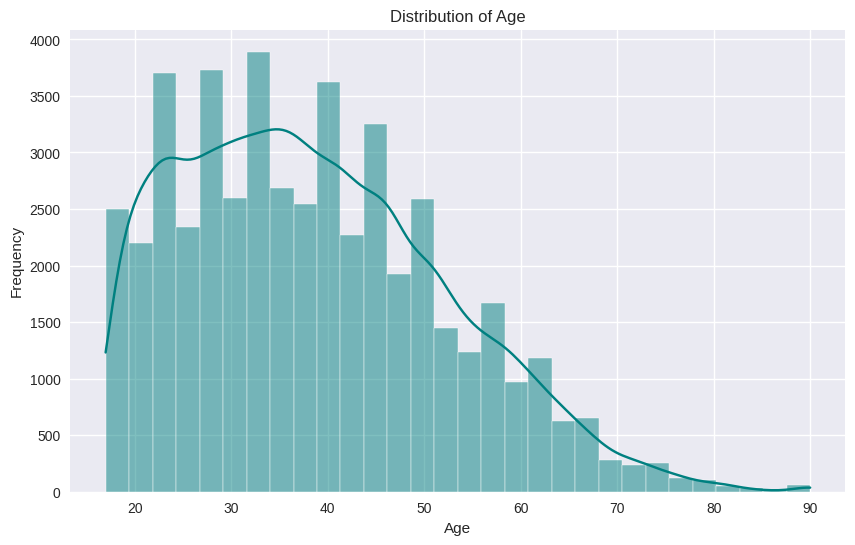

In [ ]:
# Plot age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True, bins=30, color='teal')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


**Find Total Number of Persons with Age Between 17 and 48**

In [ ]:
# Count persons between ages 17 and 48
age_between_17_48 = data[data['age'].between(17, 48)].shape[0]
print(f"Number of Persons Between Ages 17 and 48: {age_between_17_48}")

Number of Persons Between Ages 17 and 48: 37272


**Distribution of Workclass Column**

<ipython-input-14-bdd7693a1bca>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['workclass'], palette='viridis')


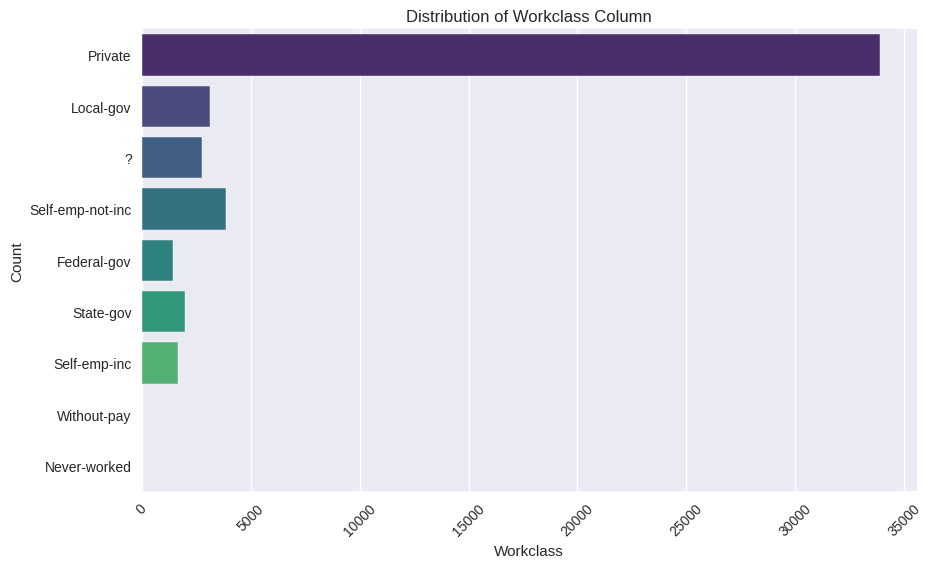

In [ ]:
# Plot workclass distribution
plt.figure(figsize=(10, 6))
sns.countplot(data['workclass'], palette='viridis')
plt.title("Distribution of Workclass Column")
plt.xlabel("Workclass")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

**Higher Education Increase Income**

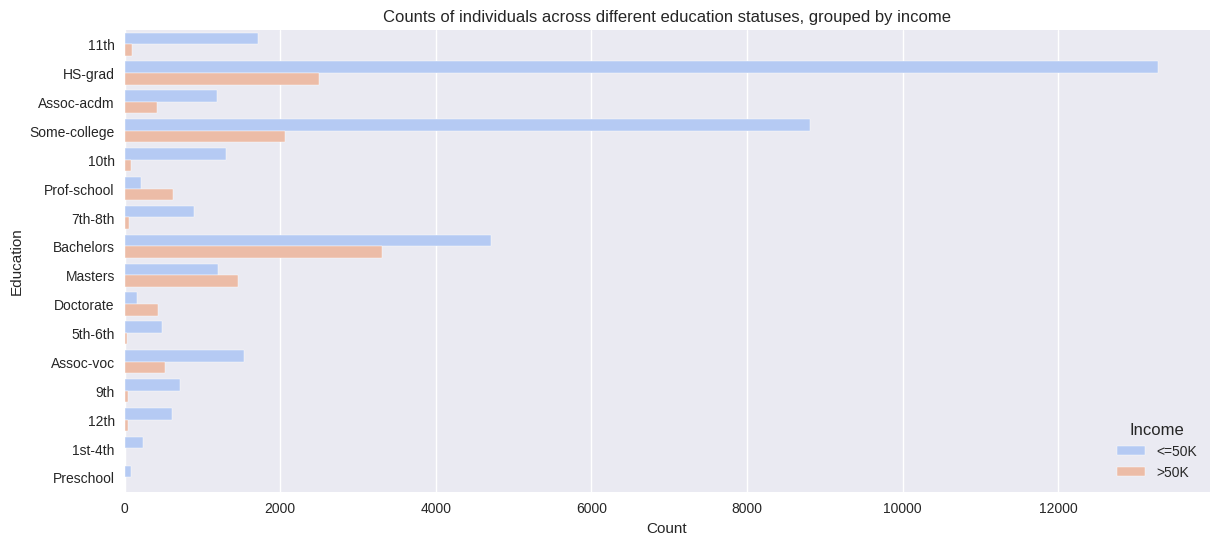

In [ ]:
# Assuming your DataFrame is named `data` and has 'education' and 'income' columns
plt.figure(figsize=(14, 6))

# Create a count plot with hue for income
sns.countplot(data=data, y='education', hue='income', palette='coolwarm')

# Set titles and labels
plt.title("Counts of individuals across different education statuses, grouped by income")
plt.xlabel("Count")
plt.ylabel("Education")

plt.legend(title="Income")
plt.show()


Top 5 top 5 education levels by count and income

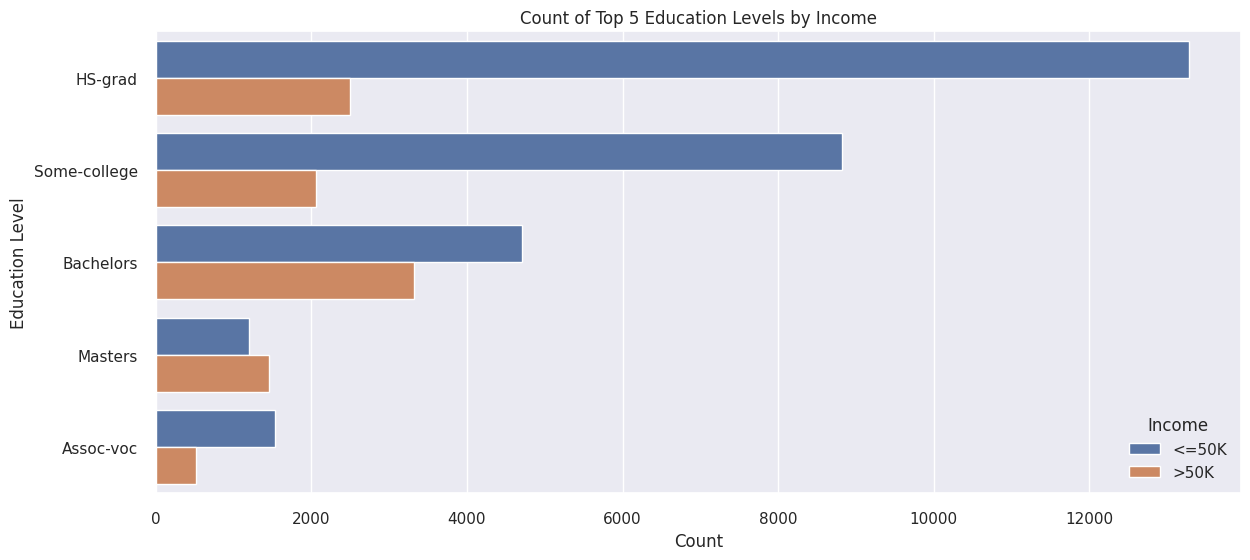

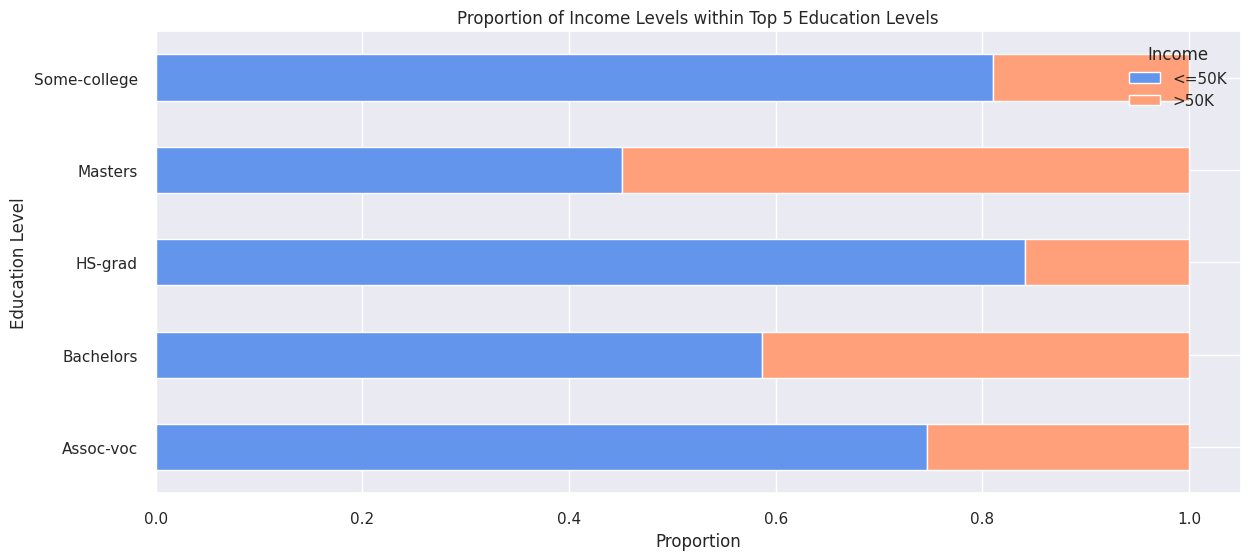

In [ ]:
# Set the style
sns.set(style="darkgrid")

# Get the top 5 education levels by count
top_5_education_levels = data['education'].value_counts().nlargest(5).index
top_5_data = data[data['education'].isin(top_5_education_levels)]

# Plot the count of individuals by top 5 education levels and income
plt.figure(figsize=(14, 6))
sns.countplot(data=top_5_data, y='education', hue='income', order=top_5_education_levels)
plt.title("Count of Top 5 Education Levels by Income")
plt.xlabel("Count")
plt.ylabel("Education Level")
plt.legend(title="Income")
plt.show()

# Calculate the proportion of individuals in each of the top 5 education levels who earn above/below $50K
edu_income_proportion_top5 = top_5_data.groupby('education')['income'].value_counts(normalize=True).unstack()

# Plot the proportion for top 5 education levels
edu_income_proportion_top5.plot(kind='barh', stacked=True, figsize=(14, 6), color=["#6495ED", "#FFA07A"])
plt.title("Proportion of Income Levels within Top 5 Education Levels")
plt.xlabel("Proportion")
plt.ylabel("Education Level")
plt.legend(title="Income")
plt.show()

**Income by Occupation**

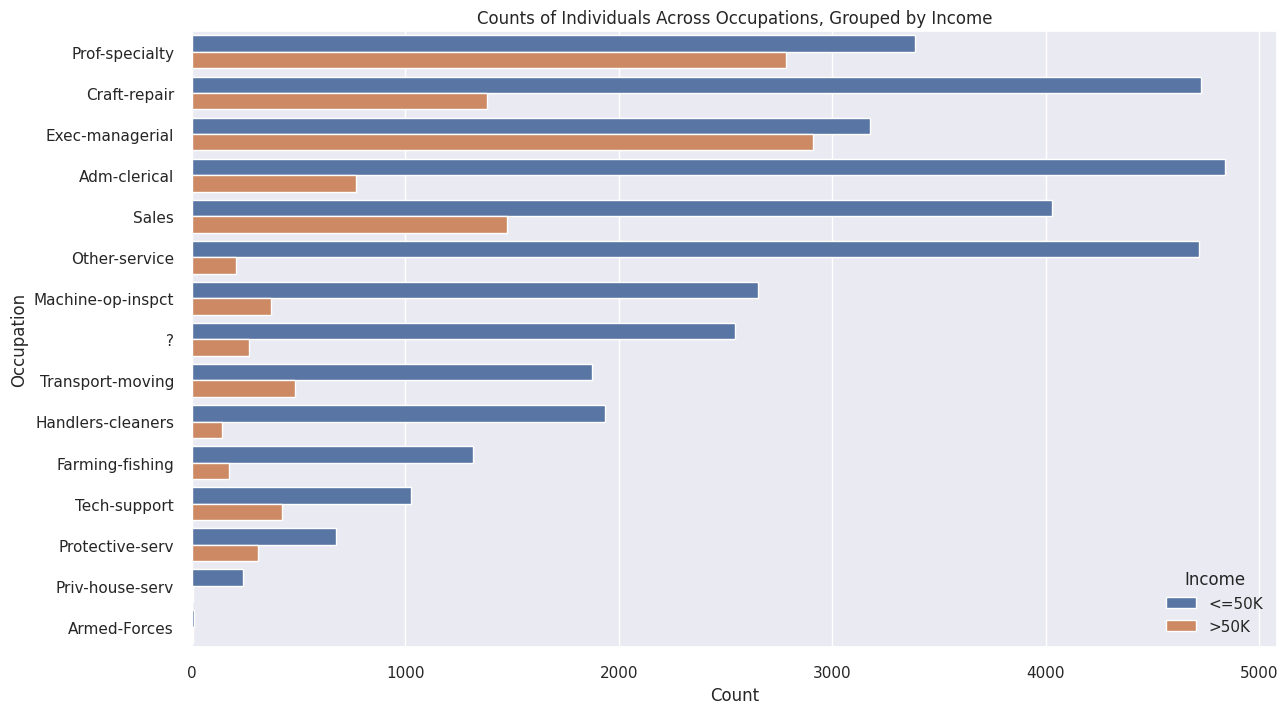

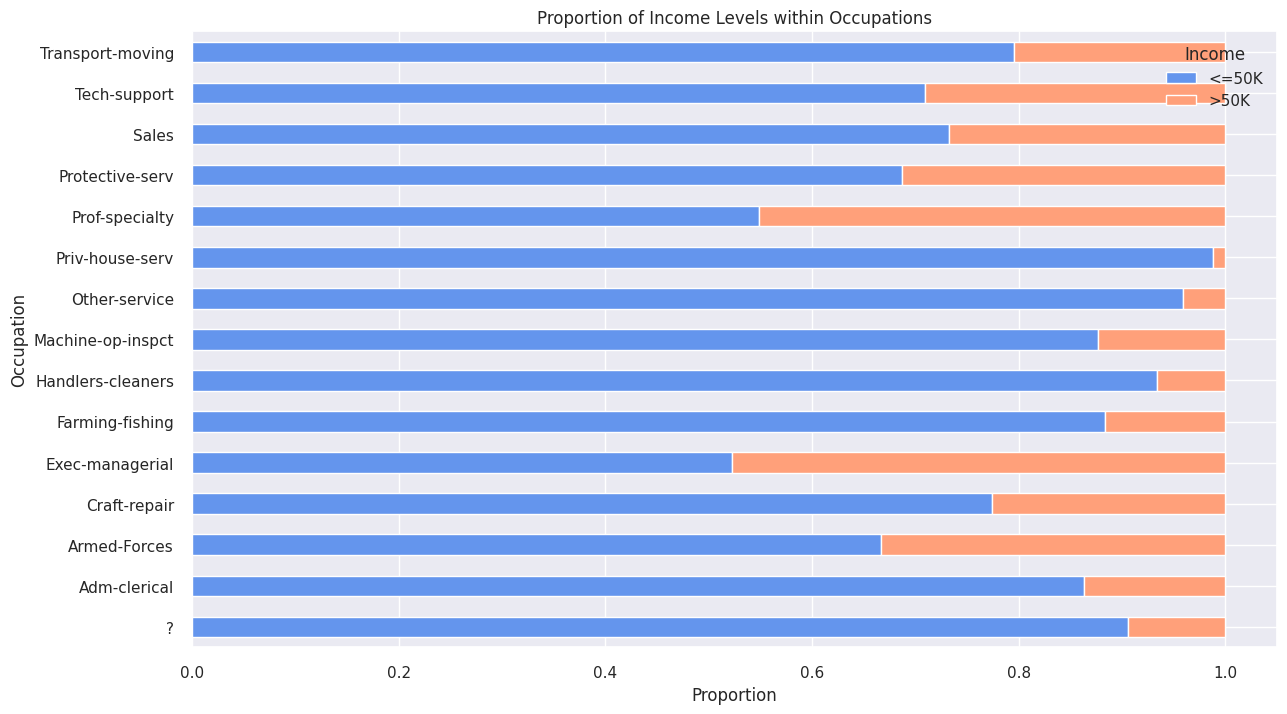

In [ ]:
# Set the style
sns.set(style="darkgrid")

# Plot the count of individuals by occupation and income
plt.figure(figsize=(14, 8))
sns.countplot(data=data, y='occupation', hue='income', order=data['occupation'].value_counts().index)
plt.title("Counts of Individuals Across Occupations, Grouped by Income")
plt.xlabel("Count")
plt.ylabel("Occupation")
plt.legend(title="Income")
plt.show()

# Calculate the proportion of individuals in each occupation who earn above/below $50K
occupation_income_proportion = data.groupby('occupation')['income'].value_counts(normalize=True).unstack()

# Plot the proportion for each occupation
occupation_income_proportion.plot(kind='barh', stacked=True, figsize=(14, 8), color=["#6495ED", "#FFA07A"])
plt.title("Proportion of Income Levels within Occupations")
plt.xlabel("Proportion")
plt.ylabel("Occupation")
plt.legend(title="Income")
plt.show()


**relationship status and income**

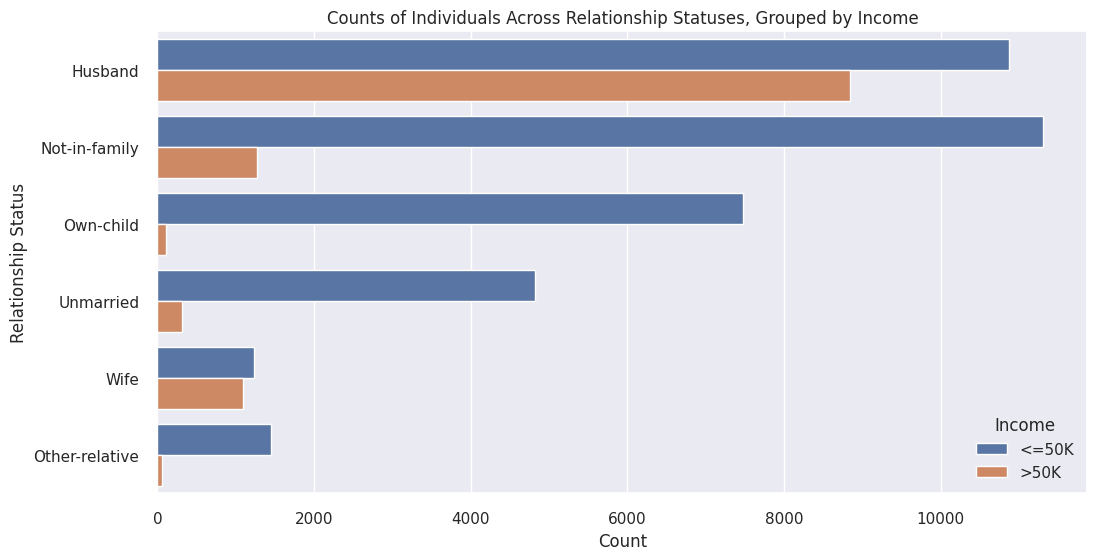

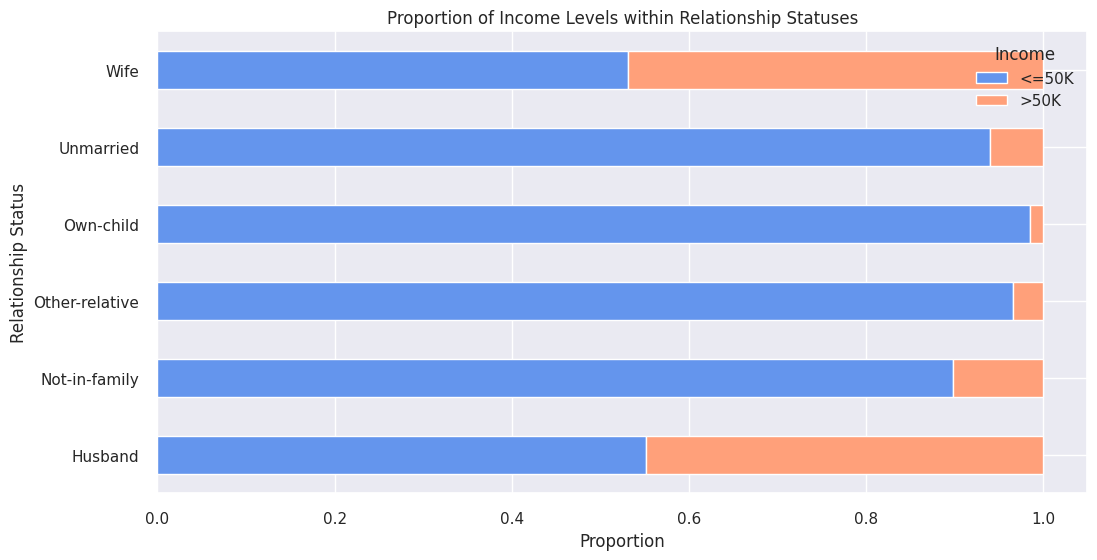

In [ ]:

# Set the style
sns.set(style="darkgrid")

# Plot the count of individuals by relationship status and income
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='relationship', hue='income', order=data['relationship'].value_counts().index)
plt.title("Counts of Individuals Across Relationship Statuses, Grouped by Income")
plt.xlabel("Count")
plt.ylabel("Relationship Status")
plt.legend(title="Income")
plt.show()

# Calculate the proportion of individuals in each relationship status who earn above/below $50K
relationship_income_proportion = data.groupby('relationship')['income'].value_counts(normalize=True).unstack()

# Plot the proportion for each relationship status
relationship_income_proportion.plot(kind='barh', stacked=True, figsize=(12, 6), color=["#6495ED", "#FFA07A"])
plt.title("Proportion of Income Levels within Relationship Statuses")
plt.xlabel("Proportion")
plt.ylabel("Relationship Status")
plt.legend(title="Income")
plt.show()


**Income by Gender**

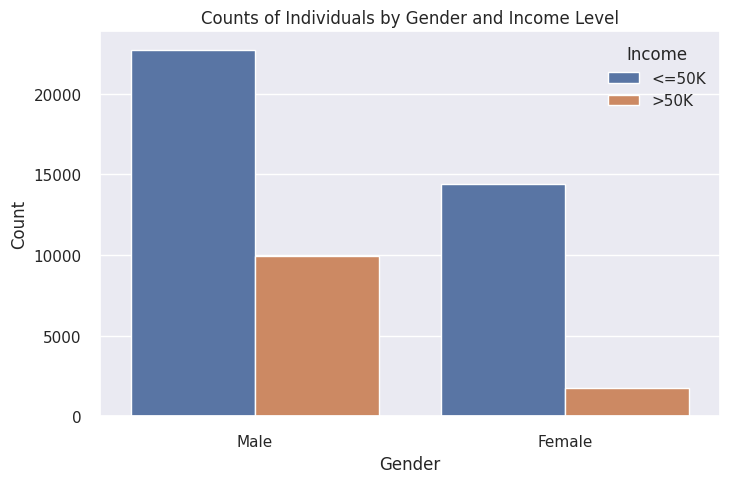

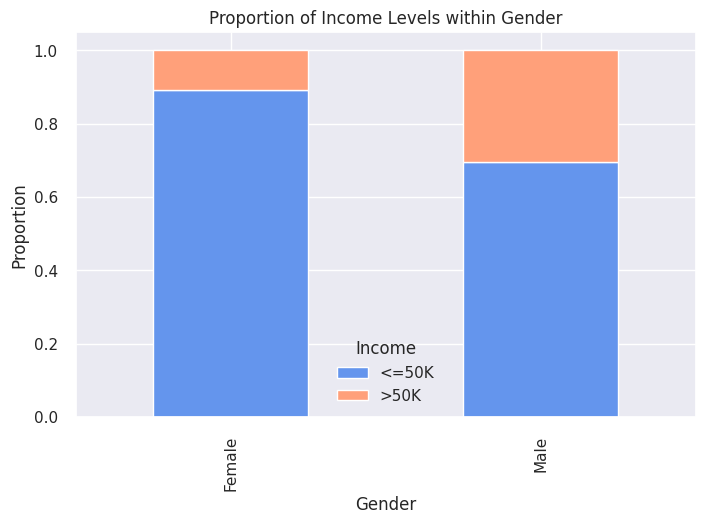

In [ ]:
# Set the style
sns.set(style="darkgrid")

# Plot the count of individuals by gender and income
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='gender', hue='income', order=data['gender'].value_counts().index)
plt.title("Counts of Individuals by Gender and Income Level")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Income")
plt.show()

# Calculate the proportion of income levels within each gender
gender_income_proportion = data.groupby('gender')['income'].value_counts(normalize=True).unstack()

# Plot the proportion for each gender
gender_income_proportion.plot(kind='bar', stacked=True, figsize=(8, 5), color=["#6495ED", "#FFA07A"])
plt.title("Proportion of Income Levels within Gender")
plt.xlabel("Gender")
plt.ylabel("Proportion")
plt.legend(title="Income")
plt.show()


**Persons with Bachelors or Masters Degree**

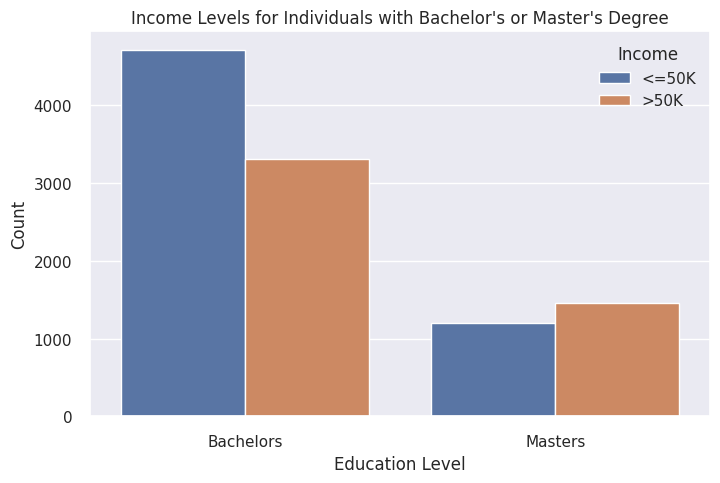

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for individuals with Bachelors or Masters degree
bachelors_masters_data = data[data['education'].isin(['Bachelors', 'Masters'])]

# Set the style
sns.set(style="darkgrid")

# Plot the count of individuals with Bachelors or Masters degree by income
plt.figure(figsize=(8, 5))
sns.countplot(data=bachelors_masters_data, x='education', hue='income')
plt.title("Income Levels for Individuals with Bachelor's or Master's Degree")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.legend(title="Income")
plt.show()


**Capital Gain and Income Analysis**

<ipython-input-35-9f9ef435ccab>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='income', y='capital-gain', palette='coolwarm')


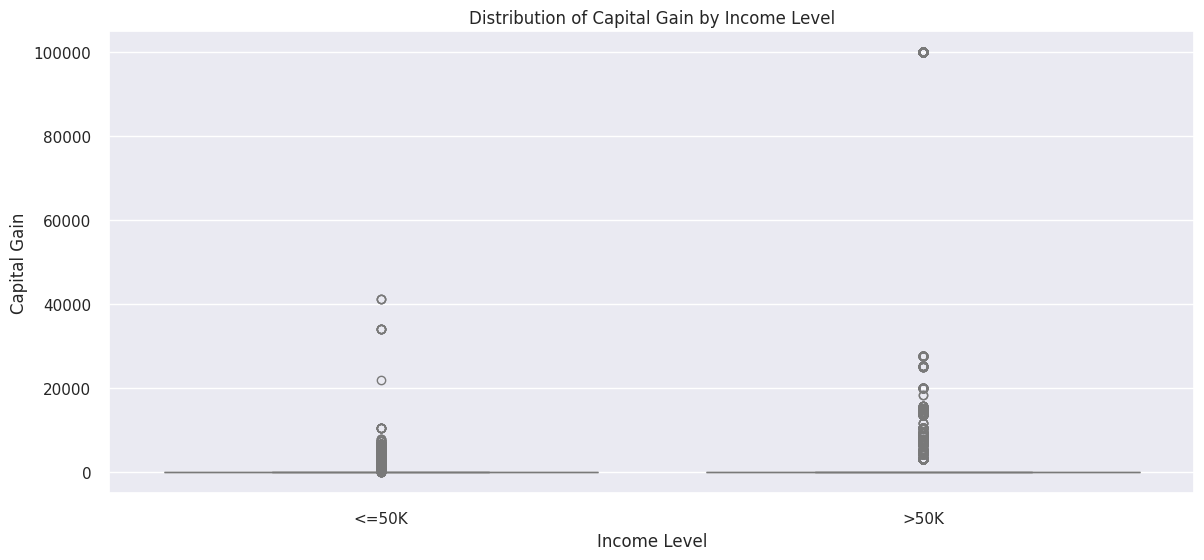

Mean Capital Gain by Income Level:
income
<=50K     147.010308
>50K     4042.239497
Name: capital-gain, dtype: float64


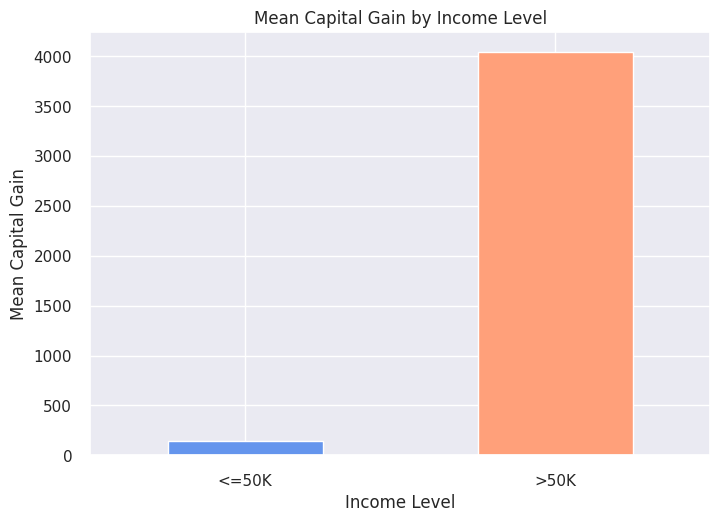

In [ ]:
# Set the style
sns.set(style="darkgrid")

# Plot the distribution of capital gain by income level
plt.figure(figsize=(14, 6))
sns.boxplot(data=data, x='income', y='capital-gain', palette='coolwarm')
plt.title("Distribution of Capital Gain by Income Level")
plt.xlabel("Income Level")
plt.ylabel("Capital Gain")
plt.show()

# Calculate the mean capital gain by income level
mean_capital_gain = data.groupby('income')['capital-gain'].mean()
print("Mean Capital Gain by Income Level:")
print(mean_capital_gain)

# Plot the mean capital gain by income level
mean_capital_gain.plot(kind='bar', color=['#6495ED', '#FFA07A'])
plt.title("Mean Capital Gain by Income Level")
plt.xlabel("Income Level")
plt.ylabel("Mean Capital Gain")
plt.xticks(rotation=0)
plt.show()

**Capital Loss and Income Analysis**

<ipython-input-36-cee0e63c7276>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='income', y='capital-loss', palette='coolwarm')


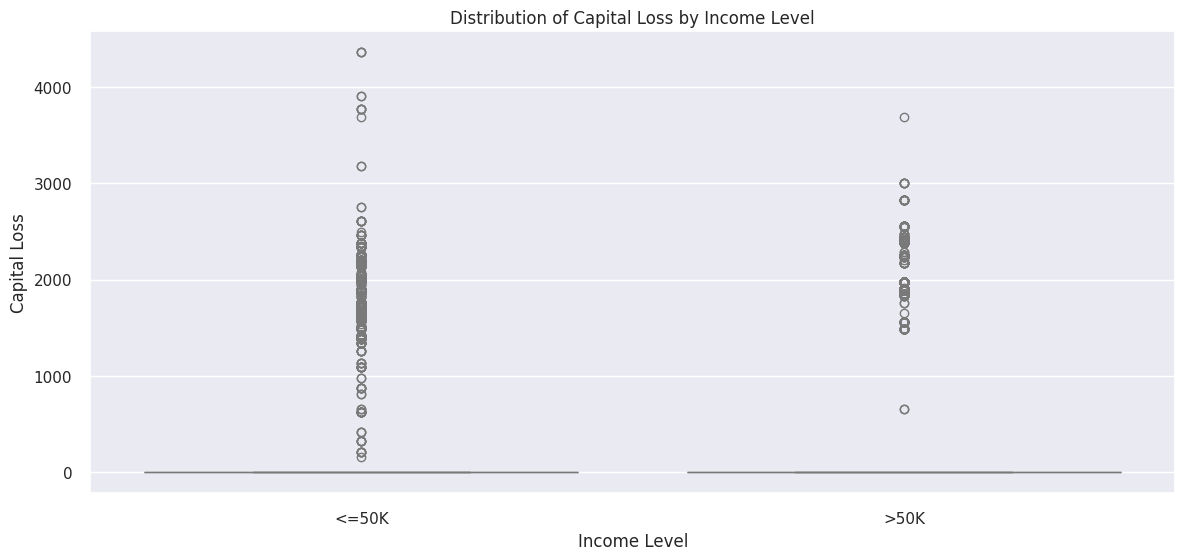

Mean Capital Loss by Income Level:
income
<=50K     54.151931
>50K     193.528964
Name: capital-loss, dtype: float64


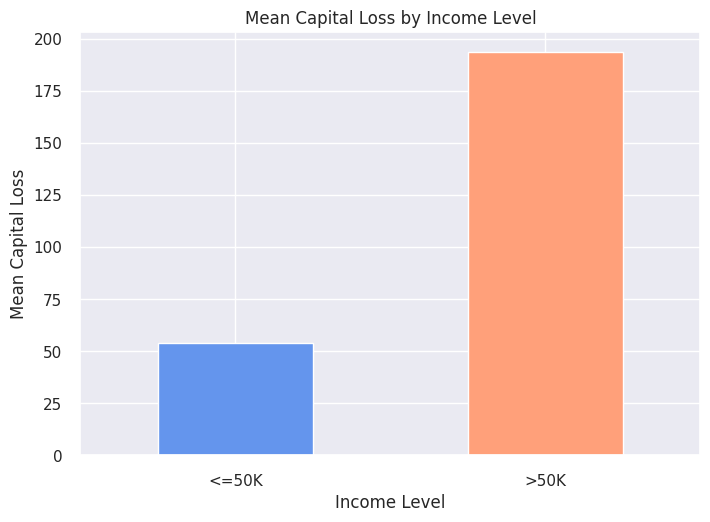

In [ ]:
# Set the style
plt.figure(figsize=(14, 6))

# Plot the distribution of capital loss by income level
sns.boxplot(data=data, x='income', y='capital-loss', palette='coolwarm')
plt.title("Distribution of Capital Loss by Income Level")
plt.xlabel("Income Level")
plt.ylabel("Capital Loss")
plt.show()

# Calculate the mean capital loss by income level
mean_capital_loss = data.groupby('income')['capital-loss'].mean()
print("Mean Capital Loss by Income Level:")
print(mean_capital_loss)

# Plot the mean capital loss by income level
mean_capital_loss.plot(kind='bar', color=['#6495ED', '#FFA07A'])
plt.title("Mean Capital Loss by Income Level")
plt.xlabel("Income Level")
plt.ylabel("Mean Capital Loss")
plt.xticks(rotation=0)
plt.show()

**Hours Per Week and Income Analysis**

<ipython-input-37-3bf228be006b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='income', y='hours-per-week', palette='coolwarm')


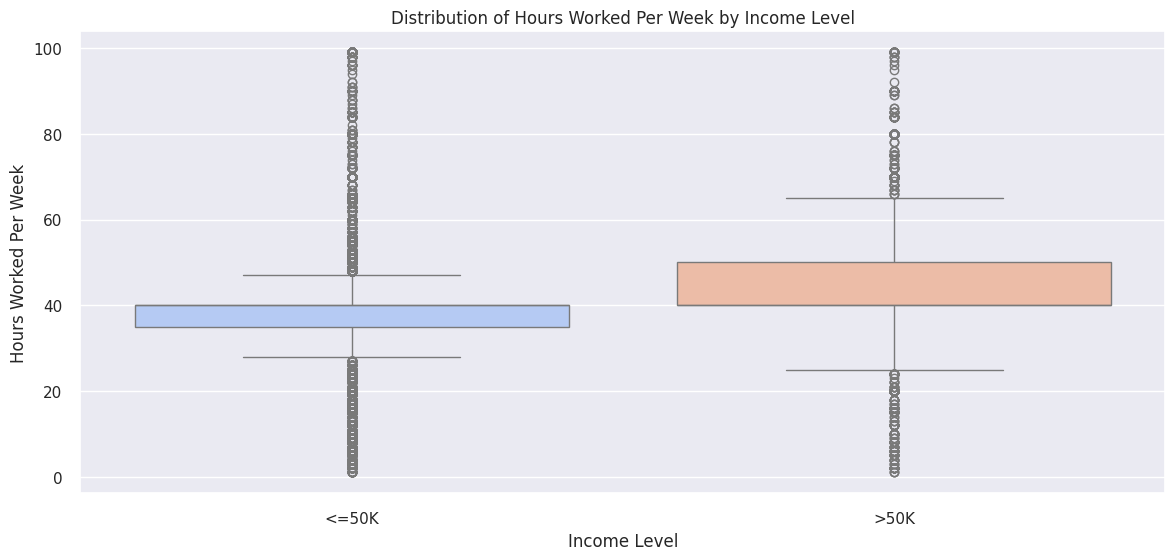

Mean Hours Worked Per Week by Income Level:
income
<=50K    38.840048
>50K     45.452896
Name: hours-per-week, dtype: float64


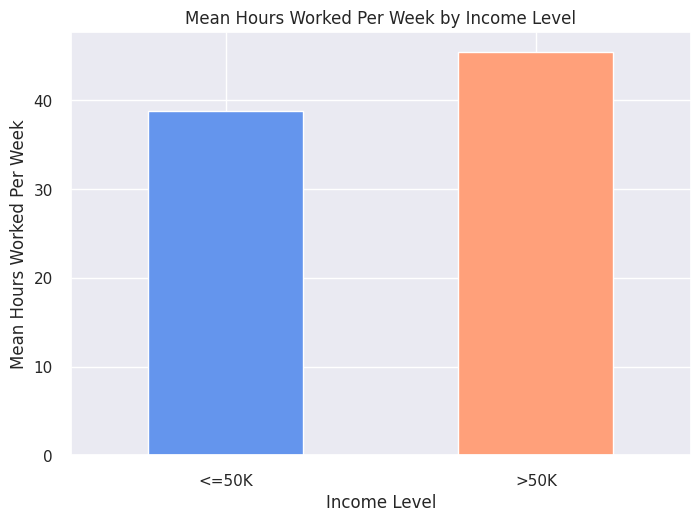

In [ ]:
# Set the style
plt.figure(figsize=(14, 6))

# Plot the distribution of hours worked per week by income level
sns.boxplot(data=data, x='income', y='hours-per-week', palette='coolwarm')
plt.title("Distribution of Hours Worked Per Week by Income Level")
plt.xlabel("Income Level")
plt.ylabel("Hours Worked Per Week")
plt.show()

# Calculate the mean hours worked per week by income level
mean_hours_per_week = data.groupby('income')['hours-per-week'].mean()
print("Mean Hours Worked Per Week by Income Level:")
print(mean_hours_per_week)

# Plot the mean hours worked per week by income level
mean_hours_per_week.plot(kind='bar', color=['#6495ED', '#FFA07A'])
plt.title("Mean Hours Worked Per Week by Income Level")
plt.xlabel("Income Level")
plt.ylabel("Mean Hours Worked Per Week")
plt.xticks(rotation=0)
plt.show()


In [ ]:
sum(data['education'].isin(['Bachelors','Masters']))

10669

# 8. Bivariate Analysis

**Replace Income Values with 0 and 1**

In [ ]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

In [ ]:
data.head()



,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,18,?,103497,Some-college,Never-married,?,Own-child,White,Female,30,United-States,<=50K


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data Analysis/Python Project/Adult Income Analysis/adult.csv', skipinitialspace=True)


In [ ]:
data.columns = data.columns.str.strip()

In [ ]:
data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [ ]:
# lets find number of records for each category in this salary column.
# for that we can use "value_counts" method of Pandas

In [ ]:
data['income'].value_counts()

,count
income,
<=50K,37155
>50K,11687


<Axes: xlabel='income', ylabel='count'>

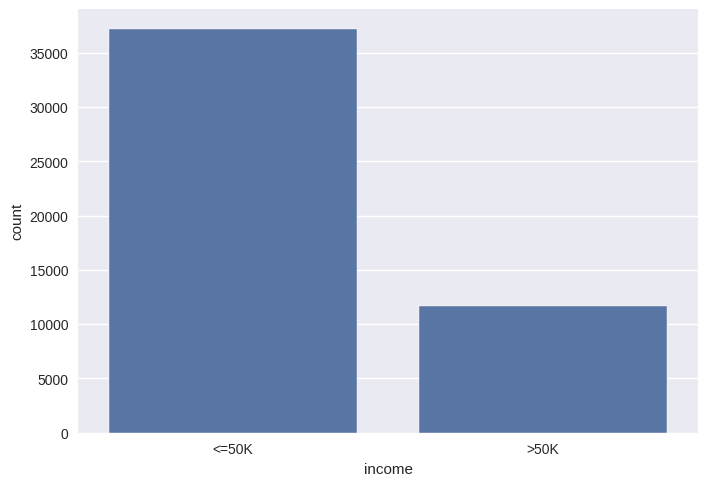

In [ ]:
sns.countplot(x='income',data = data)

In [ ]:
def income_data(inc):
    if inc=='<=50K':
        return 0
    else:
        return 1
data['enconded_salary'] = data['income'].apply(income_data)
data.head(1)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,enconded_salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0


Display the updated unique values in the income column

**Highest Salary by Workclass**

**Gender Comparison for Higher Salary Probability**

**Convert Workclass Column Data Type to Category**

In [ ]:
# Convert workclass to categorical data type
data['workclass'] = data['workclass'].astype('category')
print("Updated Data Types:\n", data.dtypes)


Updated Data Types:
 age                   int64
workclass          category
fnlwgt                int64
education            object
educational-num       int64
marital-status       object
occupation           object
relationship         object
race                 object
gender               object
capital-gain          int64
capital-loss          int64
hours-per-week        int64
native-country       object
income               object
enconded_salary       int64
dtype: object


In [ ]:
pip install pandas numpy seaborn matplotlib

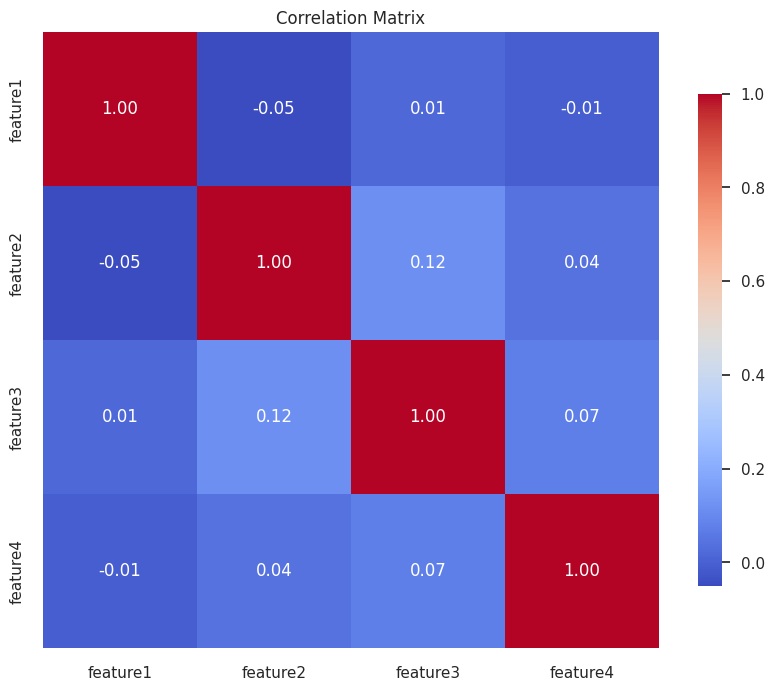

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample dataset creation (you can replace this with your own dataset)
data = {
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'feature3': np.random.rand(100),
    'feature4': np.random.rand(100)
}
df = pd.DataFrame(data)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Set the title
plt.title("Correlation Matrix")
plt.show()



## 7. Conclusion
The analysis of the Adult Income dataset reveals significant socio-economic patterns that influence income levels among adults. Key findings include:

- **Demographic Factors:** Age, education, and work class are strong indicators of income. Older individuals and those with higher education levels tend to earn more, highlighting the importance of education and experience in income potential.
- **Gender Disparity:** A noticeable gender disparity exists, with men being more likely to earn over 50K compared to women. This points to ongoing issues of inequality in the workforce.
- **Occupation Influence:** Certain occupations are consistently associated with higher earnings, suggesting that career choice plays a crucial role in income distribution.
- **Socio-Economic Insights:** The data provides valuable insights for policymakers, educators, and career counselors to address income inequality and support individuals in achieving higher income potential through targeted education and training programs.

Overall, this analysis serves as a foundation for further research into income distribution and socio-economic factors, encouraging data-driven decision-making in various sectors.

---